# Using Uniform Manifold Approximation and Projection (UMAP) to Differentiate Subsets of Gene Populations
#### In this Jupyter Notebook, we will be following the standard setup for a UMAP environment as well as perform a UMAP analysis on an example data set.
***

### Import Tools for UMAP: 

In [31]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

The main tools for UMAP are those that we have already seen in class - numpy, seaborn, and pandas. It's cool to see the content we're taught in class used for these sorts of high-level analyses! Without all of these packages installed, the UMAP package won't be able to run! 

The sklearn packages are also required to run UMAP, they are used primarily in the preprocessing of the data.
***

### Import UMAP:

In [32]:
import umap

We also need to make sure that the conda environment has the UMAP package installed, to do this - go to your terminal and do:
```
source activate <conda environment/kernel>
conda install -c conda-forge umap-learn
```
***

### Read the Data File:

In [33]:
genes = pd.read_excel("/Users/frankiegarcia/Library/CloudStorage/OneDrive-Personal/Documents/Columbia/Classes/fall2022/python/IntroPython/coding_project/cluster_data.xlsx")
genes.head()

/Users/frankiegarcia/opt/anaconda3/envs/intropython/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,GeneSymbol,E17MG,P7nMG,P7pMG,P14MG,P21MG,P60MG,LPSMG,E17MY.,P21MY,...,E17toLPS.PV,E17toLPS.FDR,P60toLPS.logFC,P60toLPS.logCPM,P60toLPS.PV,P60toLPS.FDR,P60MYtoP60MG.logFC,P60MYtoP60MG.logCPM,P60MYtoP60MG.PV,P60MYtoP60MG.FDR
0,Cst3,1950.633333,5299.520,10472.630,23727.533330,32992.133330,22254.3925,13602.803330,613.1610,3230.6230,...,0.002506,0.059004,-0.52,13.63,0.62,0.94,4.35,13.13,0.01,0.08
1,Hexb,1547.193667,3292.425,4176.465,7197.210000,7127.126667,6118.1000,3159.793333,809.5240,190.8191,...,0.170271,0.673269,-1.05,13.01,0.22,0.80,4.49,12.70,0.01,0.08
2,Ctsd,2074.017000,3232.545,2196.820,5952.613333,5053.176667,5933.1200,2450.233333,909.7520,1307.3370,...,0.659532,0.930346,-0.88,12.62,0.32,0.85,4.25,12.26,0.01,0.09
3,Tmsb4x,6152.000000,6651.865,9701.255,9010.593333,7145.866667,4083.9275,3823.686667,7596.7400,4010.9650,...,0.438951,0.850262,-0.12,11.26,0.88,0.99,-0.97,11.74,0.41,0.74
4,C1qc,1380.795000,3895.180,2950.275,3857.646667,4030.593333,3932.2575,2485.783333,92.3517,353.7515,...,0.212535,0.712606,-0.44,11.54,0.63,0.95,3.56,11.04,0.12,0.40


To read an excel file of this size, be sure to have the package openpyxl installed into your conda environment. This data was obtained from https://urldefense.proofpoint.com/v2/url?u=https-3A__www.pnas.org_doi_full_10.1073_pnas.1525528113-23supplementary-2Dmaterials&d=DwMFaQ&c=009klHSCxuh5AI1vNQzSO0KGjl4nbi2Q0M1QLJX9BeE&r=Rcq6m0mNl15PREInDil6wDm9Uog9ancwqCXkec89isU&m=W0cciBNqu_eiooohvkiHHWtOqoY_fy_ZQ2o6oTlUpXfHovnGE5RhwXlV9g1HKR4x&s=UFwn8wloh3KuQSBpj49Uuec8yRejNnKiFcedaWwsMU4&e=

***

### Processing the Data File:

In [55]:
genes = genes.dropna()
cluster_count = genes.clusterID.value_counts()
cluster_count

45.0     95
1.0      74
413.0    49
206.0    47
27.0     46
         ..
56.0      1
560.0     1
265.0     1
678.0     1
150.0     1
Name: clusterID, Length: 670, dtype: int64

Here, we start by doing a blanket line of code to get rid of any NaN values that could potentially be in the data set. I then check the amount of genes associated with each cluster.

In [60]:
reducer = umap.UMAP(random_state=42)
gene_data = genes[
    [
        "E17MG",
        "P7nMG",
        "P7pMG",
        "P14MG",
        "P21MG",
        "P60MG",
        "LPSMG",
        "E17MY.",
        "P21MY",
        "P60MY",
        "SZMGMP",
        "E17WB.",
        "P7WB.",
        "P21WB.",
        "P60WB",
        "E17LivMY."
    ]
].values
reducer.fit(gene_data)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In this set of Processing, we are selecting the columns that we want to analyze using the UMAP software. The way UMAP reduces dimensionality is included in the package notes. From what I understand, we are training the UMAP software by giving a z-score to the different parameters/columns and clustering them that way. We are using the Standard Scaler that we imported from the SciKit. By reducing the dimensionality, and processing the data - we will be able to grasp multiple planes of information from a 2D representation!

In [61]:
embedding = reducer.transform(gene_data)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(4196, 2)

Embedding is the process of taking that reduced dimension and trained matrix and storing it so that it can be plotted using UMAP.
***

### Creating and Exporting your UMAP Representation:

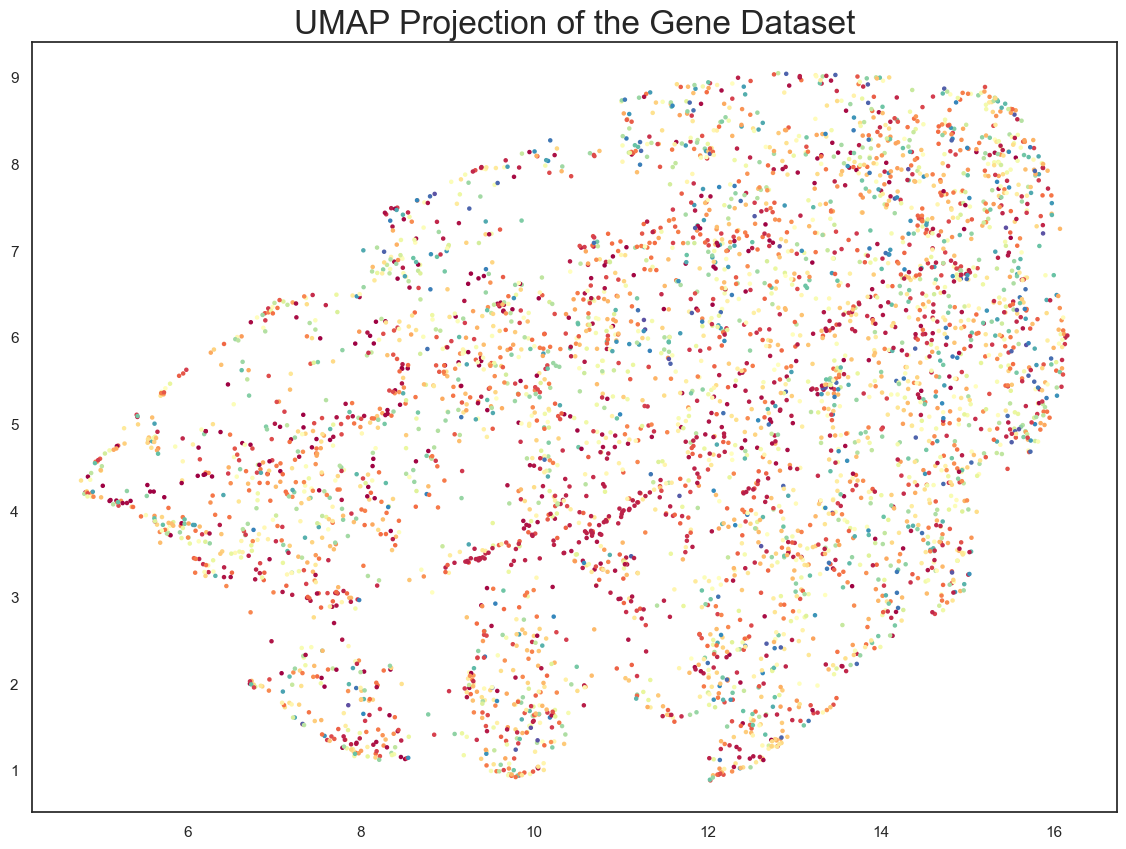

In [64]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

plt.scatter(embedding[:, 0], embedding[:, 1], c=genes.clusterID, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Projection of the Gene Dataset', fontsize=24);
plt.savefig('UMAP.png', bbox_inches = 'tight')

This is the graph generated by using the UMAP package. It is supposed to differentiate between population subsets... if successful!
***